In [2]:
# Define the Pauli matrices
sigma_plus = np.array([[0, 1], [0, 0]], dtype=complex)
sigma_minus = np.array([[0, 0], [1, 0]], dtype=complex)
sigma_x = np.array([[0, 1], [1, 0]], dtype=complex)
sigma_y = np.array([[0, -1j], [1j, 0]], dtype=complex)
sigma_z = np.array([[1, 0], [0, -1]], dtype=complex)
I = np.eye(2, dtype=complex)

# Define the collapse operator L = sqrt(gamma) * sigma_plus
lam = 0.1
gamma_0 = 0.5

def gam(t):
    l = np.emath.sqrt(lam**2 - 2*gamma_0*lam)

    expression = ((-1*l**2 + lam**2)*np.sinh(l*t/2))/(l*np.cosh(l*t/2) + lam*np.sinh(l*t/2))

    return expression


# Define the initial density matrix rho(0)

rho0 = 0.5*np.array([[1, 1], [1, 1]], dtype=complex)  # Start in the ground state

rho0.reshape((2, 2))

array([[0.5+0.j, 0.5+0.j],
       [0.5+0.j, 0.5+0.j]])

In [13]:
# Define the Lindblad master equation in the form of a differential equation
def lindblad_rhs(rho_vec, t):

    L =  sigma_plus


    # Reshape the vectorized rho back into a matrix
    rho = rho_vec.reshape((2, 2))
    
    # Compute the terms of the master equation
    L_rho_Ldagger = L @ rho @ L.conj().T
    Ldagger_L_rho = L.conj().T @ L @ rho
    rho_Ldagger_L = rho @ L.conj().T @ L
    
    # Compute the time derivative of rho
    drho_dt = L_rho_Ldagger - 0.5 *gam(t)*(Ldagger_L_rho + rho_Ldagger_L)
    
    # Flatten the matrix back into a vector
    return drho_dt.flatten()



<>:25: SyntaxWarning: invalid escape sequence '\l'
<>:25: SyntaxWarning: invalid escape sequence '\g'
<>:25: SyntaxWarning: invalid escape sequence '\l'
<>:25: SyntaxWarning: invalid escape sequence '\g'
C:\Users\cclab1\AppData\Local\Temp\ipykernel_18448\38832760.py:25: SyntaxWarning: invalid escape sequence '\l'
  ax.set_title(f"Time Evolution of Qubit Expectations (ME)\n$\lambda$: {lam}, $\gamma_0$: {gamma_0}", fontsize=18, pad=20)
C:\Users\cclab1\AppData\Local\Temp\ipykernel_18448\38832760.py:25: SyntaxWarning: invalid escape sequence '\g'
  ax.set_title(f"Time Evolution of Qubit Expectations (ME)\n$\lambda$: {lam}, $\gamma_0$: {gamma_0}", fontsize=18, pad=20)
c:\Python312\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Python312\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


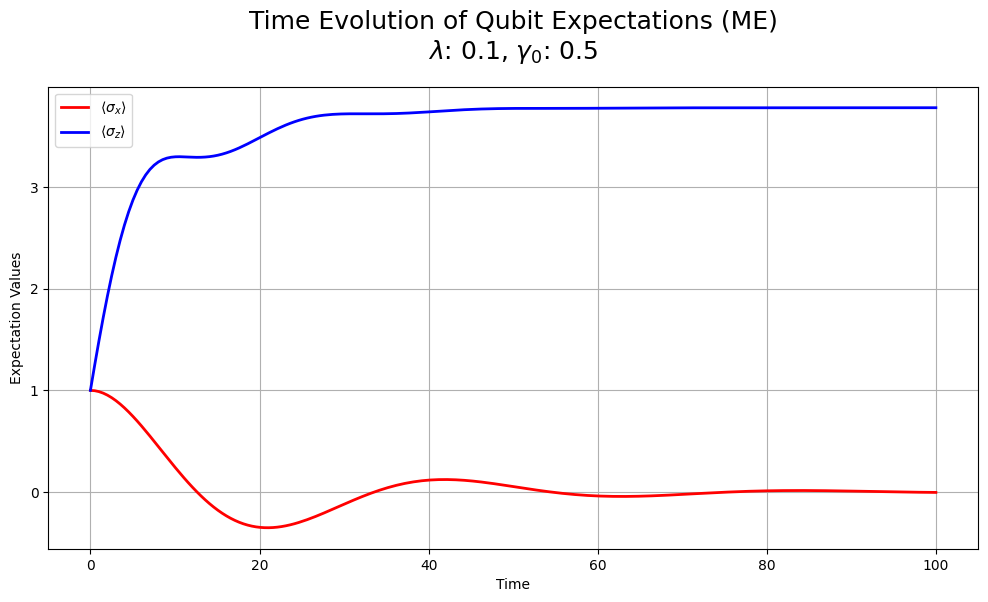

In [14]:
# Function to compute expectation value
def expectation_value(rho, sigma):
    return np.trace(np.matmul(rho,sigma))
# Time points where we want the solution
times = np.linspace(0, 100, 200)

# Solve the differential equation using odeintw
rho0_vec = rho0.flatten()  # Flatten the initial density matrix into a vector
rho_t_vec = odeintw(lindblad_rhs, rho0_vec, times)

# Reshape the solution back into matrix form
rho_t = rho_t_vec.reshape((-1, 2, 2))

# Compute expectation values for sigma_x and sigma_z
expect_x = [expectation_value(rho, sigma_x) for rho in rho_t]
expect_z = [expectation_value(rho, sigma_z) for rho in rho_t]
trace = [np.trace(rho) for rho in rho_t]
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(times, expect_x, 'r-', label=r'$\langle\sigma_x\rangle$', linewidth=2)
ax.plot(times, trace, 'b-', label=r'$\langle\sigma_z\rangle$', linewidth=2)

ax.set_xlabel('Time')
ax.set_ylabel('Expectation Values')
ax.set_title(f"Time Evolution of Qubit Expectations (ME)\n$\lambda$: {lam}, $\gamma_0$: {gamma_0}", fontsize=18, pad=20)
ax.legend()
ax.grid(True)
plt.show()


In [16]:
trace = [np.trace(rho) for rho in rho_t]

trace

[(1+0j),
 (1.247636934438261+0j),
 (1.486293591251174+0j),
 (1.7136206390892907+0j),
 (1.9276417980402187+0j),
 (2.1267716988265413+0j),
 (2.3098220152538897+0j),
 (2.475997654706897+0j),
 (2.6248833467852233+0j),
 (2.756422214517781+0j),
 (2.8708875726332193+0j),
 (2.9688492446570667+0j),
 (3.0511358303488865+0j),
 (3.1187941214658785+0j),
 (3.173046987440069+0j),
 (3.215250873369855+0j),
 (3.246853982313437+0j),
 (3.269356082465162+0j),
 (3.2842707597379928+0j),
 (3.2930908380102775+0j),
 (3.297257363635436+0j),
 (3.29813272342821+0j),
 (3.296978084993078+0j),
 (3.294935276540784+0j),
 (3.293013157694513+0j),
 (3.2920783387885204+0j),
 (3.2926071112605277+0j),
 (3.2947089931060805+0j),
 (3.2986736336940505+0j),
 (3.3046969268626127+0j),
 (3.3128838699064973+0j),
 (3.3232555122476257+0j),
 (3.335757819000857+0j),
 (3.3502710390844195+0j),
 (3.3666198526671254+0j),
 (3.384583796960055+0j),
 (3.4039077495359895+0j),
 (3.4243123103836566+0j),
 (3.4455034085215326+0j),
 (3.467181630657166

In [ ]:
# Define the Pauli matrices
sigma_plus = np.array([[0, 1], [0, 0]], dtype=complex)
sigma_minus = np.array([[0, 0], [1, 0]], dtype=complex)
sigma_x = np.array([[0, 1], [1, 0]], dtype=complex)
sigma_y = np.array([[0, -1j], [1j, 0]], dtype=complex)
sigma_z = np.array([[1, 0], [0, -1]], dtype=complex)
I = np.eye(2, dtype=complex)

# Define the collapse operator L = sqrt(gamma) * sigma_plus
lam = 0.1
gamma_0 = 0.5

def gam(t):
    l = np.emath.sqrt(lam**2 - 2*gamma_0*lam)

    expression = ((-1*l**2 + lam**2)*np.sinh(l*t/2))/(l*np.cosh(l*t/2) + lam*np.sinh(l*t/2))

    return expression


# Define the initial density matrix rho(0)

rho0 = 0.5*np.array([[1, 1], [1, 1]], dtype=complex)  # Start in the ground state

rho0.reshape((2, 2))


# Define the Lindblad master equation in the form of a differential equation
def lindblad_rhs(rho_vec, t):

    L =  sigma_plus


    # Reshape the vectorized rho back into a matrix
    rho = rho_vec.reshape((2, 2))
    
    # Compute the terms of the master equation
    L_rho_Ldagger = L @ rho @ L.conj().T
    Ldagger_L_rho = L.conj().T @ L @ rho
    rho_Ldagger_L = rho @ L.conj().T @ L
    
    # Compute the time derivative of rho
    drho_dt = L_rho_Ldagger - 0.5 *gam(t)*(Ldagger_L_rho + rho_Ldagger_L)
    
    # Flatten the matrix back into a vector
    return drho_dt.flatten()

# Function to compute expectation value
def expectation_value(rho, sigma):
    return np.trace(np.matmul(rho,sigma))
# Time points where we want the solution
times = np.linspace(0, 100, 200)

# Solve the differential equation using odeintw
rho0_vec = rho0.flatten()  # Flatten the initial density matrix into a vector
rho_t_vec = odeintw(lindblad_rhs, rho0_vec, times)

# Reshape the solution back into matrix form
rho_t = rho_t_vec.reshape((-1, 2, 2))

# Compute expectation values for sigma_x and sigma_z
expect_x = [expectation_value(rho, sigma_x) for rho in rho_t]
expect_z = [expectation_value(rho, sigma_z) for rho in rho_t]
trace = [np.trace(rho) for rho in rho_t]
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(times, expect_x, 'r-', label=r'$\langle\sigma_x\rangle$', linewidth=2)
ax.plot(times, trace, 'b-', label=r'$\langle\sigma_z\rangle$', linewidth=2)

ax.set_xlabel('Time')
ax.set_ylabel('Expectation Values')
ax.set_title(f"Time Evolution of Qubit Expectations (ME)\n$\lambda$: {lam}, $\gamma_0$: {gamma_0}", fontsize=18, pad=20)
ax.legend()
ax.grid(True)
plt.show()